# Project Description
In this project, we will try to predict the Stock Price of Microsoft using historical data. We will incorporate machine learning concepts and blend them with components of Deep Learning to create a Time Series Model using Long Short Term Memory (LSTM).

# Tools Required
<ul>
  <li>Python 3.10 or greater</li>
  <li>An IDE <i>(e.g VS Code, PyCharm, Spyder, Jupyter Notebook, Google Colab)</i></li>
</ul>

# Prerequistes
<ul>
  <li>Understanding of Time Series Analysis</li>
  <li>Knowledge of Python Programming</li>
  <li>Knowledge of Deep Learning</li>
  <li>Knowledge of Machine Learning</li>
</ul>
<hr/>

# Dependendencies
Run the cell below to install the required dependencies for the project. Skip the line below if you already have these dependencies installed already.

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install --upgrade keras

In [ ]:
# FETCH THE DATA
!git clone https://github.com/Joshwen7947/LSTM-Stock-Prediction-.git

fatal: destination path 'LSTM-Stock-Prediction-' already exists and is not an empty directory.


# Libraries

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# SUPPRESS THE WARNINGS FROM TENSORFLOW
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Model Summary

Key Steps include:
1. Create a container
2. Create the First Brain layer to remember things in a sequence
3. Create the Second Brain layer that makes decisions based on the First Brain.
4. Create a Decision Making layer that decides what to do with the brain's thoughts.
5. Create a Half Helpers Resting (Dropout) layer to let half of the helpers rest to avoid mistakes.
6. Create a Dense layer for the final decision-making part.
7. Create a Toy review to check how well the toy was built.
8. Compile learning instructions to teach the toy how to improve its guesses.


<h3>Why do we need the layers?</h3>
<ul>
  <li>LSTM layers understand patterns over time</li>
  <li>Dense layers learn more complex relationships</li>
  <li>Dropout layer prevents overfitting</li>
  <li>Final output layer makes the final prediction</li>
</ul>

In [ ]:
# IMPORT THE DATA
df = pd.read_csv('LSTM-Stock-Prediction-/LTSM Model/MicrosoftStock.csv')
df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [ ]:
# BASIC INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [ ]:
# CONVERT DATE TO DATETIME
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# GENERAL STATS
df.describe()

,index,date,open,high,low,close,volume
count,1259.000000,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,2015-08-09 05:44:16.393963264,51.026394,51.436007,50.630397,51.063081,3.386946e+07
min,390198.000000,2013-02-08 00:00:00,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,2014-05-10 12:00:00,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,2015-08-10 00:00:00,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,2016-11-05 12:00:00,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,2018-02-07 00:00:00,95.140000,96.070000,93.720000,95.010000,2.483542e+08
std,363.586303,NaN,14.859387,14.930144,14.774630,14.852117,1.958979e+07


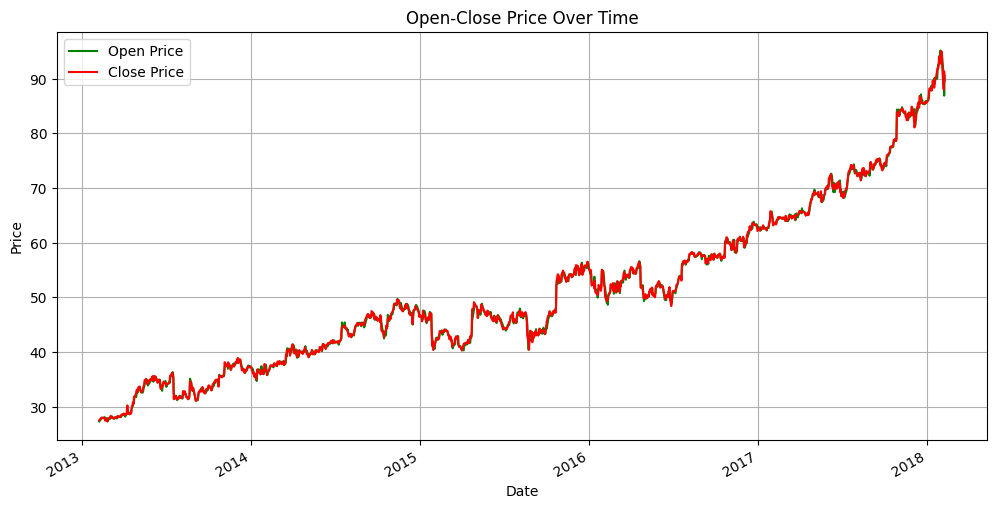

In [ ]:
# PLOT: OPEN-CLOSE PRICE OVER TIME
plt.figure(figsize=(12,6))
plt.plot(
    df['date'],
    df['open'],
    label='Open Price',
    color='green'
)

plt.plot(
    df['date'],
    df['close'],
    label='Close Price',
    color='red'
)

plt.title('Open-Close Price Over Time')
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.gcf().autofmt_xdate()
plt.show()

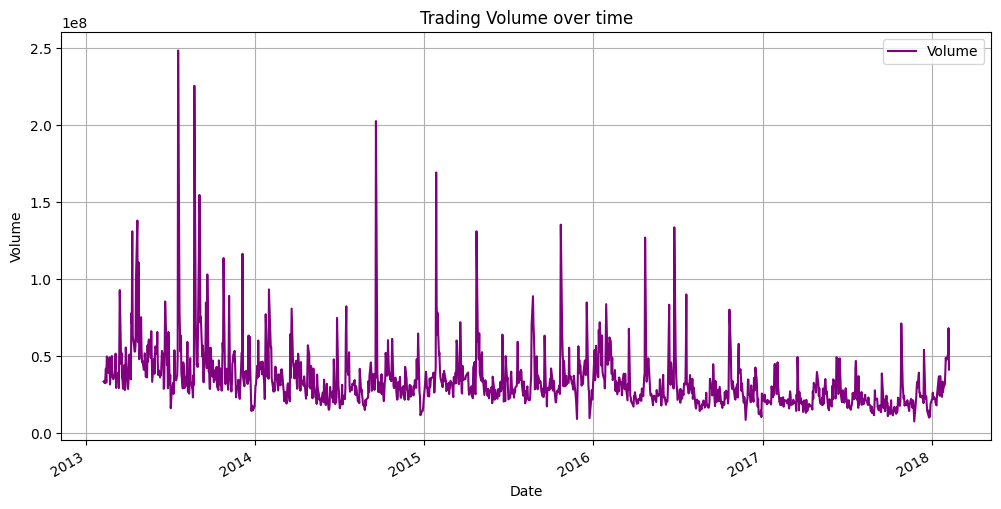

In [ ]:
# PLOT: TRADING VOLUME OVER TIME
plt.figure(figsize=(12,6))
plt.plot(
    df['date'],
    df['volume'],
    label='Volume',
    color='purple'
)

plt.title('Trading Volume over time')
plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.gcf().autofmt_xdate()
plt.show()

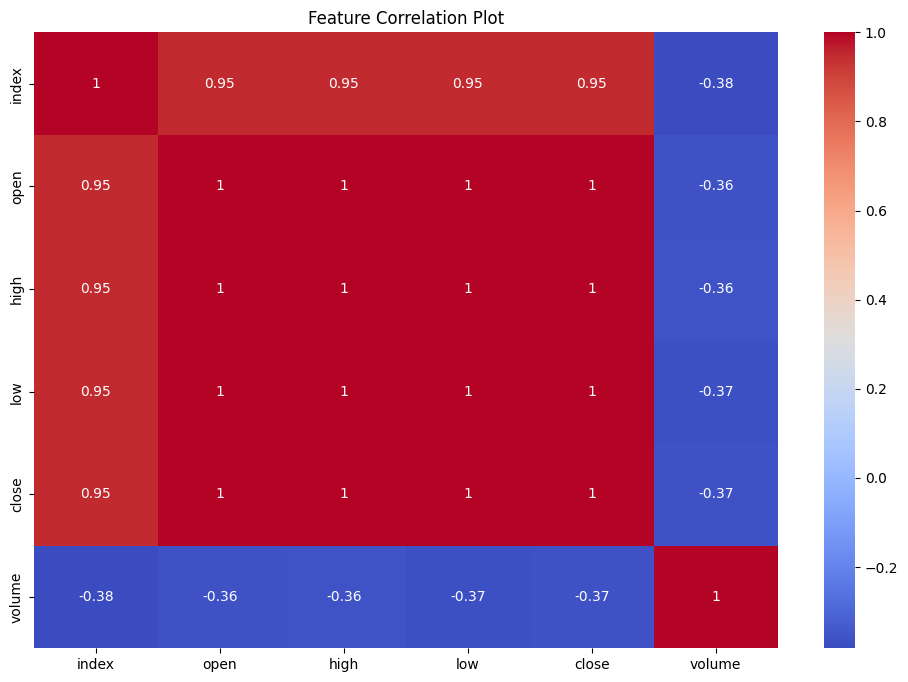

In [ ]:
# DROP NON-NUMERIC COLUMNS
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# PLOT: CORRELATION PLOT BETWEEN THE NUMERIC DATA
plt.figure(figsize=(12,8))
sns.heatmap(
    data=numeric_df.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Feature Correlation Plot')
plt.show()

In [ ]:
# CREATE A DATE FILTER
prediction = df.loc[
    (df['date'] > datetime(2013,1,1)) &
    (df['date'] < datetime(2018,1,1))
]
prediction.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [ ]:
# PREPARE DATA FOR THE MODEL
stock_close = df['close']

# CONVERT INTO A MATRIX
dataset = stock_close.values
training_df_len = int(np.ceil(len(dataset) * 0.95)) # retrieves 95% of the dataset

In [ ]:
# PREPROCESSING STEPS
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dataset.reshape(-1, 1))

In [ ]:
# TRAINING DATA
training_df = scaled_df[:training_df_len]

# TRAINING FEATURES
X_train, y_train = [], []

# CREATE A SLIDING WINDOW - THIS IS BECAUSE WE ARE DEALING WITH STOCKS DATA
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i, 0])
    y_train.append(training_df[i, 0])

# CONVERT TO X_TRAIN AND Y_TRAIN INTO ARRAYS
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# CONVERT THE TRAINING DATA INTO 3D ARRAY FOR TENSORFLOW
X_train = np.reshape(
    X_train,
     (X_train.shape[0], X_train.shape[1], 1),
)

In [ ]:
# INITIALIZE THE MODEL
model = keras.models.Sequential()

In [ ]:
""" BUILD THE LAYERS """
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1))) # first layer
model.add(keras.layers.LSTM(64, return_sequences=False)) # second layer
model.add(keras.layers.Dense(128, activation='relu')) # DENSE LAYER
model.add(keras.layers.Dropout(0.5)) # FOURTH LAYER
model.add(keras.layers.Dense(1)) # FINAL LAYER

model.summary()
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=[keras.metrics.RootMeanSquaredError()]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
""" FIT THE MODEL """
training = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.2426 - root_mean_squared_error: 0.3472
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.1352 - root_mean_squared_error: 0.1839
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.1186 - root_mean_squared_error: 0.1604
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.1124 - root_mean_squared_error: 0.1526
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.1150 - root_mean_squared_error: 0.1580
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.1138 - root_mean_squared_error: 0.1563
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.1081 - root_mean_squared_error: 0.1454
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1041 - root_mean_squared_error: 0.1414
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0992 - root_mean_squared_error: 0.1357
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.1109 - root_mean_squared_error: 0.1

In [ ]:
# PREPARE THE TEST DATA
test_df = scaled_df[training_df_len-60:]
X_test, y_test = [], dataset[training_df_len:]
for i in range(60, len(test_df)):
    X_test.append(test_df[i-60:i,0])

In [ ]:
# CONVERT X_TEST TO ARRAY
X_test = np.array(X_test)
X_test = np.reshape(
    X_test,
    (X_test.shape[0],
     X_test.shape[1],
     1
    )
)

In [ ]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[85.80345 ],
       [86.0052  ],
       [86.06035 ],
       [86.009094],
       [85.937164],
       [85.89254 ],
       [85.66295 ],
       [85.45353 ],
       [85.133675],
       [84.86072 ],
       [84.88512 ],
       [84.8997  ],
       [84.94715 ],
       [85.11673 ],
       [85.49346 ],
       [85.58556 ],
       [85.72088 ],
       [85.85612 ],
       [85.355774],
       [84.81264 ],
       [84.56836 ],
       [84.42132 ],
       [84.6688  ],
       [85.2215  ],
       [85.85805 ],
       [86.370895],
       [86.62077 ],
       [87.128334],
       [87.537735],
       [87.73845 ],
       [87.7651  ],
       [87.71271 ],
       [87.63706 ],
       [87.54361 ],
       [87.51872 ],
       [87.52533 ],
       [87.511345],
       [87.57137 ],
       [87.72197 ],
       [88.02112 ],
       [88.51988 ],
       [89.01825 ],
       [89.41925 ],
       [89.63875 ],
       [89.79661 ],
       [90.17149 ],
       [90.32636 ],
       [90.70227 ],
       [91.073296],
       [91.362885],


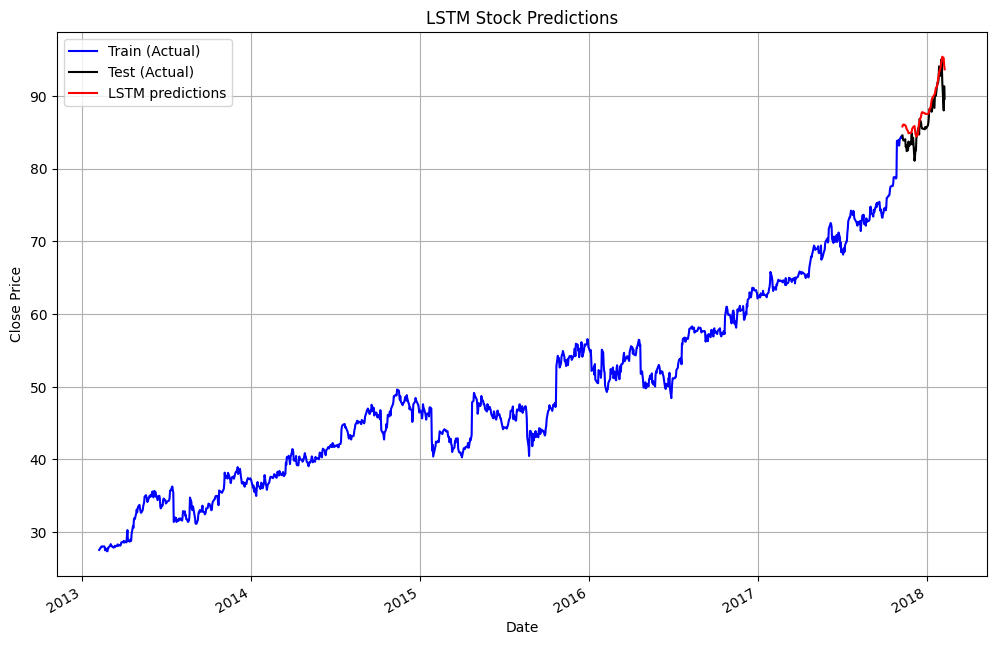

In [ ]:
# PLOTTING
train = df[:training_df_len]
test = df[training_df_len:]

test = test.copy()

test['predictions'] = predictions

# PLOT:
plt.figure(figsize=(12,8))
plt.plot(
    train['date'],
    train['close'],
    label='Train (Actual)',
    color='blue'
)
plt.plot(
    test['date'],
    test['close'],
    color='black',
    label='Test (Actual)'
)
plt.plot(
    test['date'],
    test['predictions'],
    color='red',
    label='LSTM predictions'
)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Stock Predictions')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
""" Model Evaluation """
print(f'MAPE: {round(mean_absolute_percentage_error(test['close'], test['predictions']) * 100, 2)}%')
print(f'RSME: {round(np.sqrt(mean_squared_error(test['close'], test['predictions'])), 2)}')

MAPE: 1.86%
RSME: 2.04
